# Housing Prices in Kansas City

Okay, so we want to be able to predict housing prices in Kansas City because, well, who doesn't want to live in Kansas City. And we all want that super awesome house but you already know we are going to find the best deal for it. So let's see if we can create a machine learning model that will help us see if we are truly getting a good price for our house.

## Setting things up
First we set up our environment. We import all of the packages we are going to need (aka scikit_learn to do machine learning for us, pandas for our dataframes, and matplotlib to visualize our data). We then import our data and take a look at it to make sure everything is okay.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head() # This prints the first 5 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.describe() #This sums up our data with some nice stats

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Setting up our Machine Learning parameters
We define a vector called "features." These are the parameters that are going to predict house prices such as number of beds, squarefeet, and waterfront property. We also set up the 'y' vector which is what we will want to predict eventually, the price of the home.

In [4]:
features = df.columns
features

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
features = features.drop(['id','date','price'])
features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

"X" here is the data with all of our parameters in it and excluding the things that we didn't want in it (like price, since that is our predictor and the date that the house was posted since I didn't care about that).

In [6]:
X = pd.DataFrame(df[features])
y = df.price
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Training and predicting
BOOYAH! We have everything set up. We are now ready to train our model and set it loose. We first use the 'train_test_split' function to break up our data into a training set and a different set that we will be able to make predictions on. We then use the Decision Tree method to train our data, and there you go, we have our model.

In [7]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
kc_model = DecisionTreeRegressor(random_state=1)
kc_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

We want to know how well our model is performing though. So what we need to do is calculate an error metric and then look to minimize this metric. This is one of the reasons that we split out data into a training and a validating set. Now we can run through the training data with different parameters, compare the predicted housing price to the actual value, and see how we can get the closest. The parameter we will be changing in this case is the "max_leaf_nodes" which is essentially how deep the splitting goes in the decision tree.

In [8]:
val_predictions = kc_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE: {:,.0f}".format(val_mae))

Validation MAE: 100,378


In [9]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [10]:
candidate_max_leaf_nodes = [i for i in range(2,1000)]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_list = []
min_mae = 1000000
idealnode = 5
for node in candidate_max_leaf_nodes:
    mae = get_mae(node, train_X, val_X, train_y, val_y)
    mae_list.append(mae)
    if mae < min_mae:
        min_mae = mae
        idealnode = node
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = idealnode

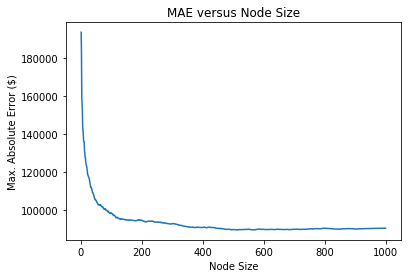

Ideal Node Size is 568 with a min. absolute error of $89686.


In [11]:
plt.figure
plt.plot(candidate_max_leaf_nodes, mae_list)
plt.xlabel('Node Size')
plt.ylabel('Max. Absolute Error ($)')
plt.title('MAE versus Node Size')
plt.show()
print('Ideal Node Size is %d with a min. absolute error of $%d.' %(idealnode,min_mae))

In [12]:
# Fit the model with best_tree_size. Fill in argument to make optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes = idealnode)

# fit the final model
final_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=568, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

## Random Forest Generator Method

The Decision Tree method of machine learning gave us an error of about $90,000, which is pretty high for most homes. We will next learn a different method, called Random Forest, which uses a bunch of different decision trees, and averages the predictions across these trees. Generally, this gives a more accurate result, and is not too difficult to implement with out current setup.

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state = 1)

# fit your model
rf_model.fit(train_X,train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_predict = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_predict,val_y)


In [18]:
print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 75449.48672103556


In [20]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [25]:
candidate_max_leaf_nodes = [i for i in range(2,1000000,1000)]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
mae_list = []
min_mae = 1000000
idealnode = 5
for node in candidate_max_leaf_nodes:
    mae = get_mae(node, train_X, val_X, train_y, val_y)
    mae_list.append(mae)
    if mae < min_mae:
        min_mae = mae
        idealnode = node
# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = idealnode

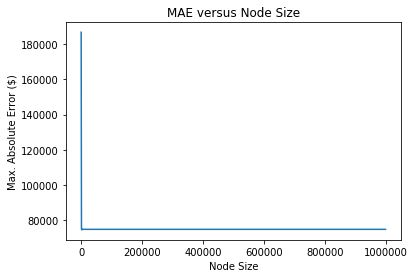

Ideal Node Size is 2002 with a min. absolute error of $74611.


In [26]:
plt.figure
plt.plot(candidate_max_leaf_nodes, mae_list)
plt.xlabel('Node Size')
plt.ylabel('Max. Absolute Error ($)')
plt.title('MAE versus Node Size')
plt.show()
print('Ideal Node Size is %d with a min. absolute error of $%d.' %(idealnode,min_mae))

## XGBoot
An even more sophisticated method, although can only be used with tabular data, is XGBoost, which is essentially an algorithm that calculates an error metric and constantly improves the model to minimize error. It works like this:

but for some reason I cannot import or install xgboost :(

In [30]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, verbose=False)

ImportError: No module named 'xgboost'

In [31]:
# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

NameError: name 'my_model' is not defined